In [36]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pickle

In [37]:
import pandas as pd

df = pd.read_csv('dataset/alldata_up.csv')
print(df)

      Elbow_theta  ShFE_theta  ShAA_theta  Elbow_tao  ShFE_tao  ShAA_tao
0          0.0000      0.0000     0.00000   0.000000    0.0000   0.00000
1          0.0000      0.0000     0.00000   0.000018    0.0000   0.00000
2          0.0000      0.0000     0.00000   0.000074    0.0000   0.00000
3          0.0000      0.0000     0.00000   0.000166    0.0000   0.00000
4          0.0000      0.0000     0.00000   0.000294    0.0000   0.00000
...           ...         ...         ...        ...       ...       ...
8724       1.5142      1.1184    -0.01885   2.624700    4.8517   0.63967
8725       1.5205      1.1184    -0.01885   2.633800    4.8611   0.64710
8726       1.5205      1.1184    -0.01885   2.642900    4.8705   0.65456
8727       1.5268      1.1247    -0.01885   2.652000    4.8799   0.66206
8728       1.5331      1.1247    -0.01885   2.661000    4.8892   0.66960

[8729 rows x 6 columns]


In [38]:
import numpy as np 

In [39]:
dataset = df.to_numpy()
dataset

array([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00],
       [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.8358e-05,  0.0000e+00,
         0.0000e+00],
       [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  7.3671e-05,  0.0000e+00,
         0.0000e+00],
       ...,
       [ 1.5205e+00,  1.1184e+00, -1.8850e-02,  2.6429e+00,  4.8705e+00,
         6.5456e-01],
       [ 1.5268e+00,  1.1247e+00, -1.8850e-02,  2.6520e+00,  4.8799e+00,
         6.6206e-01],
       [ 1.5331e+00,  1.1247e+00, -1.8850e-02,  2.6610e+00,  4.8892e+00,
         6.6960e-01]])

In [40]:
x = dataset [:,0:3]
y = dataset [:,3:6]

In [41]:
x

array([[ 0.     ,  0.     ,  0.     ],
       [ 0.     ,  0.     ,  0.     ],
       [ 0.     ,  0.     ,  0.     ],
       ...,
       [ 1.5205 ,  1.1184 , -0.01885],
       [ 1.5268 ,  1.1247 , -0.01885],
       [ 1.5331 ,  1.1247 , -0.01885]])

In [42]:
x.shape

(8729, 3)

In [43]:
y.shape

(8729, 3)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

In [45]:
y_train.shape

(6983, 3)

In [46]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

In [47]:
etr = ExtraTreesRegressor(n_estimators=50)
etr.fit(X_train, y_train)
score = etr.score(X_train, y_train)
print("Score: ", score)

Score:  0.9978491984104272


In [48]:
path = "trainedmodels/ETR2.sav"
pickle.dump(etr, open(path, 'wb'))

In [49]:
cv_scores = cross_val_score(etr, X_train, y_train, cv = 10)
print("Mean cross-validataion score: %.2f" % cv_scores.mean())

Mean cross-validataion score: 1.00


In [50]:
ypred = etr.predict(X_val)
mse = mean_squared_error(y_val, ypred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % mse**(0.5))
etr.score(X_val, y_val)

MSE: 0.02
RMSE: 0.15


0.9954944642351323

In [51]:
ypred = etr.predict(X_test)
mse = mean_squared_error(y_test, ypred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % mse**(0.5))


MSE: 0.01
RMSE: 0.12


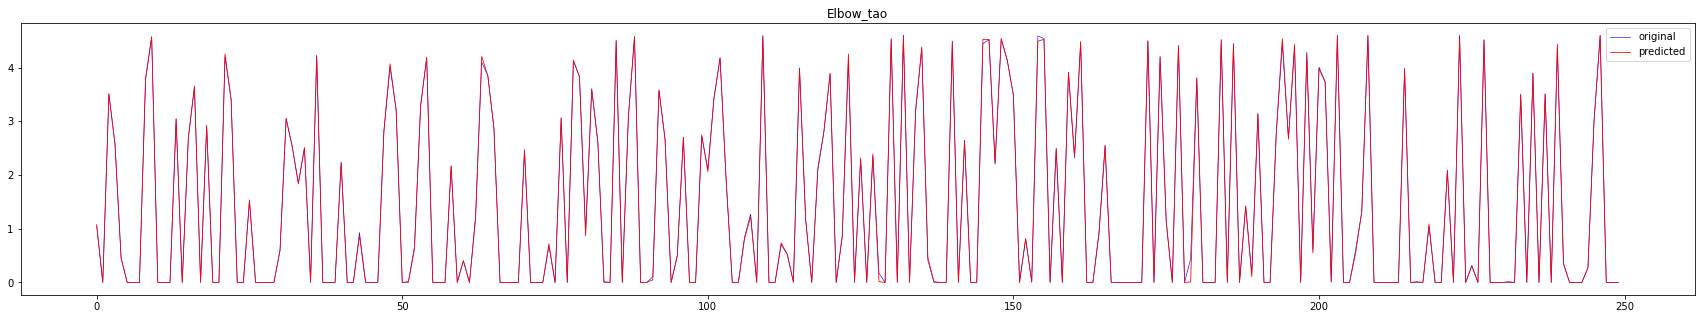

In [52]:
limit = 250
x_ax = range(limit)
plt.figure(figsize=(30, 5))
plt.plot(x_ax, y_test[:limit,0], lw=0.6, color="blue", label="original")
plt.plot(x_ax, ypred[:limit,0], lw=0.8, color="red", label="predicted")
plt.title("Elbow_tao")
plt.legend()
plt.show()

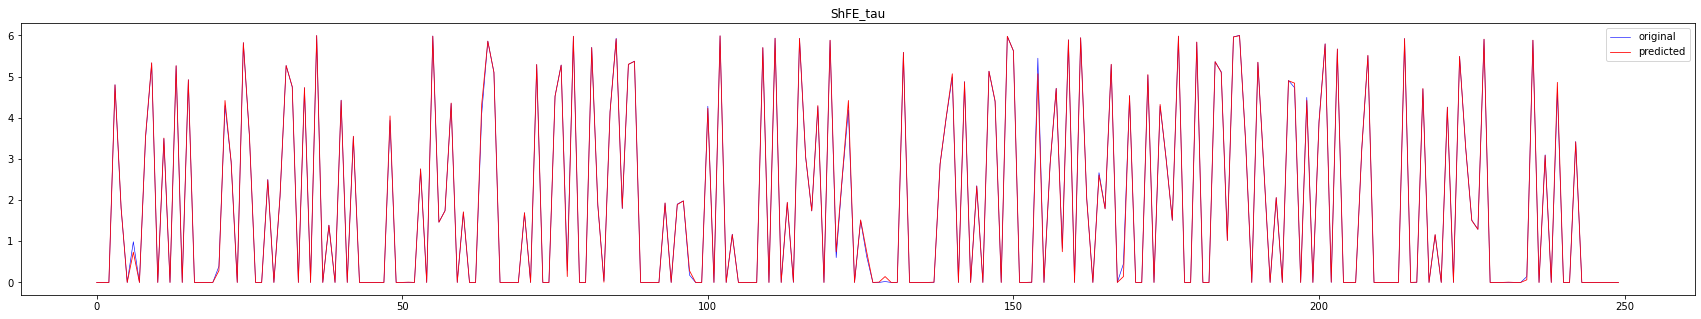

In [53]:
x_ax = range(limit)
plt.figure(figsize=(30, 5))
plt.plot(x_ax, y_test[:limit,1], lw=0.6, color="blue", label="original")
plt.plot(x_ax, ypred[:limit,1], lw=0.8, color="red", label="predicted")
plt.title("ShFE_tau")
plt.legend()
plt.show()

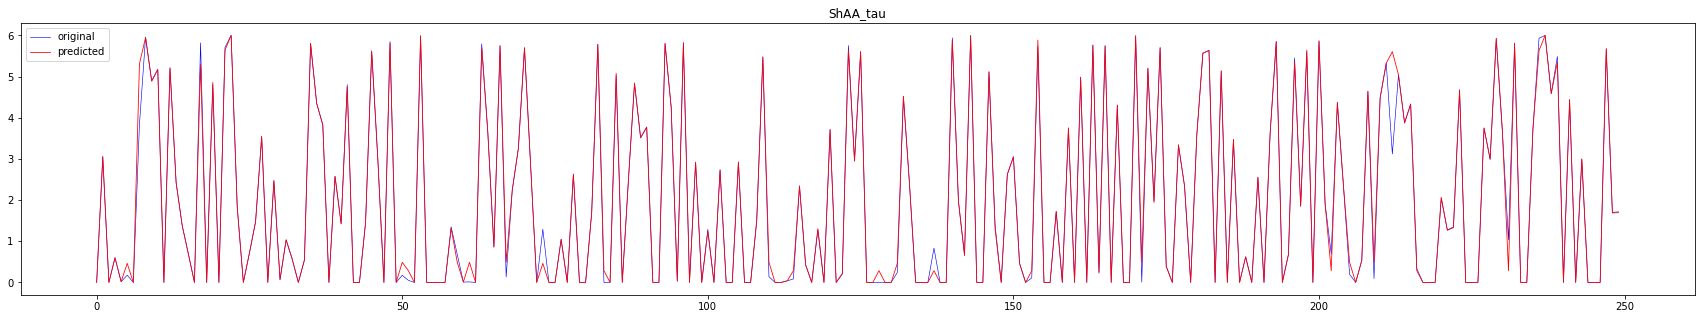

In [54]:
x_ax = range(limit)
plt.figure(figsize=(30, 5))
plt.plot(x_ax, y_test[:limit,2], lw=0.6, color="blue", label="original")
plt.plot(x_ax, ypred[:limit,2], lw=0.8, color="red", label="predicted")
plt.title("ShAA_tau")
plt.legend()
plt.show()

In [55]:
etr.score(X_test, y_test)

0.9969669940127339

In [56]:
df2 = df.mean(axis=0)

In [57]:
df2

Elbow_theta    0.768458
ShFE_theta     0.517555
ShAA_theta     0.489417
Elbow_tao      1.516110
ShFE_tao       2.075894
ShAA_tao       1.972651
dtype: float64

In [62]:
a = pd.read_csv('dataset/test.csv')
# a = a.to_numpy
print(a)
# a = a[:, [3, 4, 5]]
a = a.iloc[:, 0:3]
ypred2 = etr.predict(a)
pd.DataFrame(ypred2).to_csv("ypred.csv", index=False)

      -0.037699  0.0062832  -0.0062832     2.3  0.40192     4.5
0       0.00000   0.006283   -0.006283  2.3092  0.40794  4.5104
1       0.44611   0.025133   -0.006283  2.3184  0.41401  4.5207
2       0.91106   0.119380   -0.006283  2.3276  0.42011  4.5311
3       1.13730   0.326730   -0.006283  2.3368  0.42626  4.5414
4       1.20640   0.590620   -0.006283  2.3460  0.43244  4.5517
...         ...        ...         ...     ...      ...     ...
3176    1.51420   1.118400   -0.018850  2.6247  0.63967  4.8517
3177    1.52050   1.118400   -0.018850  2.6338  0.64710  4.8611
3178    1.52050   1.118400   -0.018850  2.6429  0.65456  4.8705
3179    1.52680   1.124700   -0.018850  2.6520  0.66206  4.8799
3180    1.53310   1.124700   -0.018850  2.6610  0.66960  4.8892

[3181 rows x 6 columns]


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but ExtraTreesRegressor was fitted without feature names
  warnings.warn(
